<a href="https://colab.research.google.com/github/Rohit0911/6companies30days/blob/main/SKIN_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('dl-cancer-project')
jovian.set_colab_id('1lpY-QeM5TsWFpPVw-enPnJdUyPGWyxa0')

In [31]:
import torch

# dl-cancer-project

Use the "Run" button to execute the code.

In [4]:
!pip install jovian --upgrade --quiet


     |████████████████████████████████| 68 kB 4.5 MB/s 


In [5]:
import jovian

In [6]:
# Execute this to save new versions of the notebook
jovian.commit(project="SKIN_Cancer")

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


## TO DO
1. Pick a dataset
2. Download and import the dataset using Pytorch
3. Explore the dataset
4. Prepare the dataset for training

### Downlooad the Dataset using 'opendatasets' from https://www.kaggle.com/fanconic/skin-cancer-malignant-vs-benign

In [7]:
!pip install opendatasets --upgrade --quiet

In [8]:
import opendatasets as od

In [9]:
data_set_url='https://www.kaggle.com/fanconic/skin-cancer-malignant-vs-benign'

In [10]:
od.download(data_set_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: 
Your Kaggle username: 
Your Kaggle username: 
Your Kaggle username: 
Your Kaggle username: 
Your Kaggle username: rohit0911
Your Kaggle Key: ··········


100%|██████████| 325M/325M [00:09<00:00, 35.3MB/s]


##IMport the datasets into Pytorch
Use the'ImageFolder' class from 'torchvision'

In [11]:
data_direc='skin-cancer-malignant-vs-benign'

In [12]:
import os

In [13]:
os.listdir(data_direc)

['train', 'data', 'test']

In [14]:
from torchvision.datasets import ImageFolder

In [15]:
dataset=ImageFolder(data_direc)

In [16]:
len(dataset)

6594

In [17]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=224x224 at 0x7FDD90052510>, 0)

In [18]:
dataset.classes

['data', 'test', 'train']

In [19]:
for cls in os.listdir(data_direc):
  print(cls, ':', len(os.listdir(data_direc+'/'+cls+'/')))

train : 2
data : 2
test : 2


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

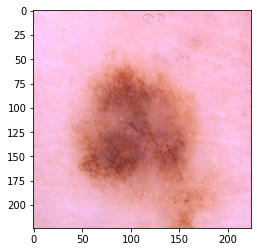

In [21]:
img,label=dataset[1]
plt.imshow(img)

In [22]:
import torchvision.transforms as tt
dataset= ImageFolder(data_direc,tt.Compose([tt.Resize(224),
                                            tt.RandomCrop(224),
                                            tt.ToTensor()]))

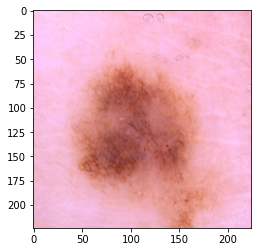

In [23]:
img,label=dataset[1]
plt.imshow(img.permute(1,2,0))

In [24]:
from torch.utils import data
val_pct=0.1
val_size=int(val_pct*len(dataset))
train_size=len(dataset)-val_size
train_size, val_size

(5935, 659)

In [25]:
from torch.utils.data import random_split
train_ds,valid_ds =random_split(dataset,[train_size,val_size])
len(train_ds),len(valid_ds)

(5935, 659)

In [26]:
from torch.utils.data import DataLoader
batch_size=256
train_dl=DataLoader(train_ds,
                    batch_size,
                    shuffle=True,
                    num_workers=4,
                    pin_memory=True)
valid_dl=DataLoader(valid_ds,
                    batch_size,
                    num_workers=4,
                    pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [27]:
from torchvision.utils import make_grid
def show_batch(dl):
  for images,labels in dl:
    fig,ax=plt.subplots(figsize=(12,6))
    ax.set_xticks([]);ax.set_yticks([])
    ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


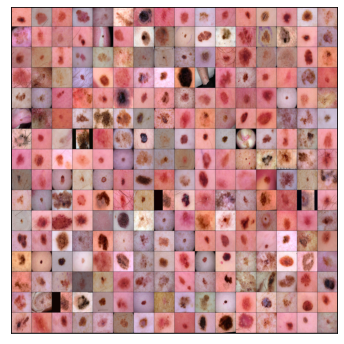

In [28]:
show_batch(train_dl)

##GPU Utilities         Utlity Function & classes

In [29]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [32]:
import torch
torch.cuda.is_available()

True

In [33]:
device=get_default_device()
device

device(type='cuda')

In [34]:
img,label=dataset[0]

In [35]:
img

tensor([[[0.6941, 0.7451, 0.7373,  ..., 0.7529, 0.7373, 0.7255],
         [0.7765, 0.8353, 0.8275,  ..., 0.8431, 0.8392, 0.8353],
         [0.7569, 0.8157, 0.8118,  ..., 0.8235, 0.8196, 0.8196],
         ...,
         [0.7412, 0.8118, 0.8118,  ..., 0.8353, 0.8392, 0.8275],
         [0.7373, 0.8157, 0.8118,  ..., 0.8431, 0.8275, 0.8235],
         [0.7333, 0.8039, 0.8078,  ..., 0.8431, 0.8275, 0.8275]],

        [[0.5490, 0.5922, 0.5961,  ..., 0.6118, 0.6118, 0.6000],
         [0.6118, 0.6588, 0.6627,  ..., 0.6824, 0.6784, 0.6588],
         [0.5961, 0.6510, 0.6510,  ..., 0.6863, 0.6667, 0.6510],
         ...,
         [0.6157, 0.6706, 0.6784,  ..., 0.6941, 0.6863, 0.6706],
         [0.6196, 0.6627, 0.6706,  ..., 0.6863, 0.6706, 0.6667],
         [0.6078, 0.6627, 0.6745,  ..., 0.6863, 0.6667, 0.6627]],

        [[0.5804, 0.6118, 0.6039,  ..., 0.6275, 0.6235, 0.6196],
         [0.6275, 0.6706, 0.6706,  ..., 0.6980, 0.6941, 0.6706],
         [0.6196, 0.6588, 0.6667,  ..., 0.7020, 0.6863, 0.

In [36]:
img.shape

torch.Size([3, 224, 224])

In [37]:
img_gpu=to_device(img,device)
img_gpu.device

device(type='cuda', index=0)

In [38]:
train_dl=DeviceDataLoader(train_dl,device)
valid_dl=DeviceDataLoader(train_dl,device)

## Model and Training Utilities

In [1]:
import torch.nn as nn
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
      #"Calculate loss for batch of training data"
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
      #"Calculate loss & accuracy for batch of validation data"
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

## Model

In [2]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [13]:
def to_device(data,device):
  model = to_device(ResNet9(3, len(dataset.classes)), device)
  model 
  model.conv1[0].weight.device

# Pass one batch of tensors through model

In [14]:
for batch in train_dl:
  images,labels=batch
  print('images.shape', images.shape)
  print('images.device' images.device)
  preds=model(images)
  print('preds.shape',preds.shape)
  break

SyntaxError: ignored